In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
bicycle = pd.read_csv('bicycle_dataset/train.csv')

In [4]:
bicycle.head(5)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [5]:
bicycle.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [6]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []
    
    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

In [7]:
year, month, day = seperate_datetime(bicycle)

In [8]:
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

In [9]:
bicycle.head(5)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


In [15]:
data_description = bicycle.describe()

In [11]:
interest_columns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 
                   'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

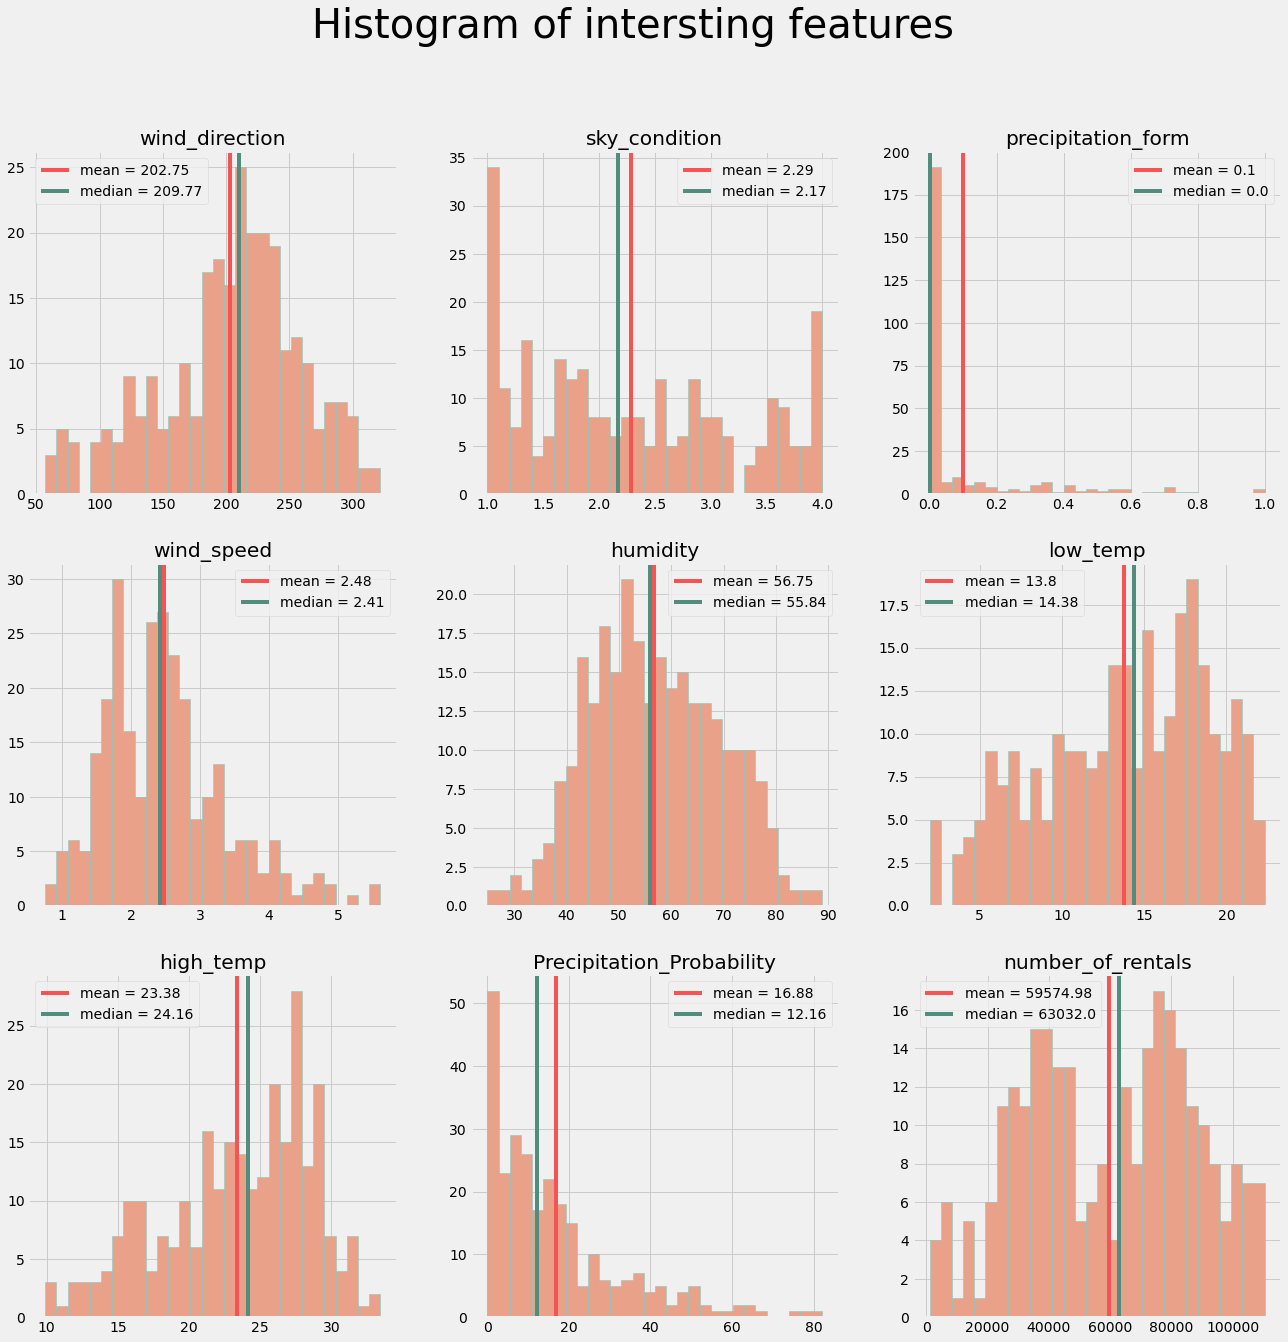

In [27]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Histogram of intersting features', fontsize=40)

column_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(bicycle[interest_columns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_columns[column_idx])
        ax[i][j].axvline(data_description[interest_columns[column_idx]]['mean'],c='#f55354', label = f"mean = {round(data_description[interest_columns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_columns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_columns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1
        

In [20]:
week_day = pd.to_datetime(bicycle['date_time']).dt.day_name()
bicycle['week_day'] = week_day
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


In [21]:
bicycle_number = bicycle.select_dtypes(np.number)

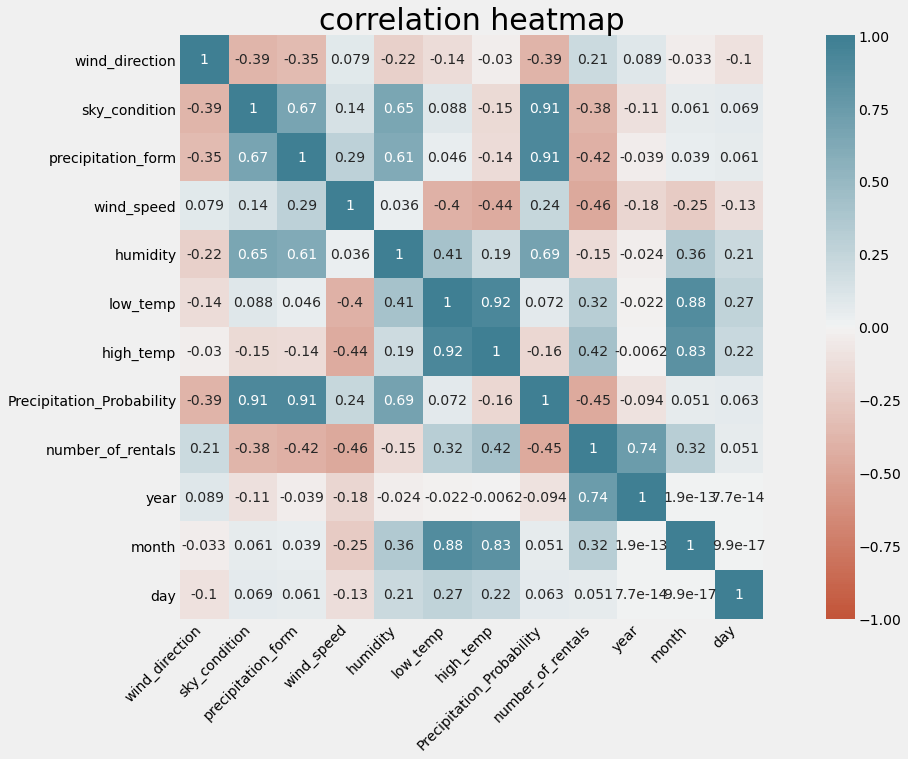

In [28]:
corr = bicycle_number.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
                square=True, annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('correlation heatmap', fontsize=30)
plt.show()

In [24]:
year_rentals = bicycle.groupby('year').sum()['number_of_rentals']
month_rentals = bicycle.groupby('month').sum()['number_of_rentals']
day_rentals = bicycle.groupby('day').sum()['number_of_rentals']

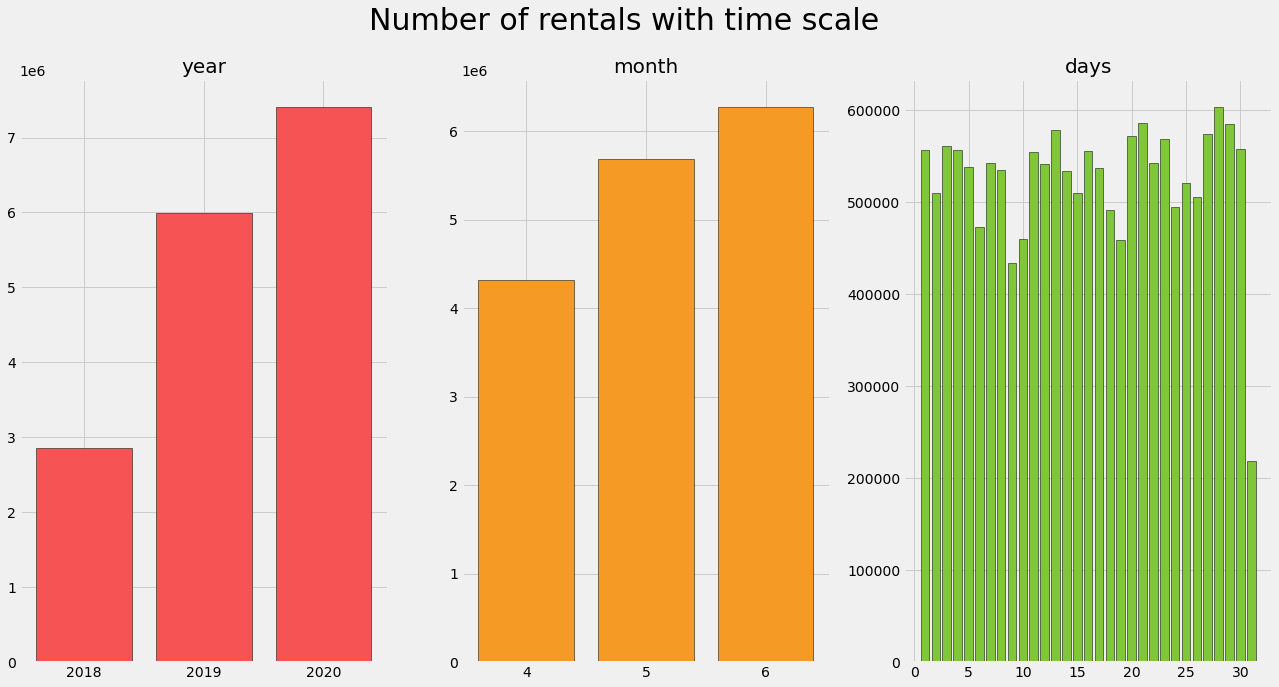

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize=20)

ax[1].bar(x=['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize=20)

ax[2].bar(x=day_rentals.index.to_list(), height=day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize=20)

plt.show()

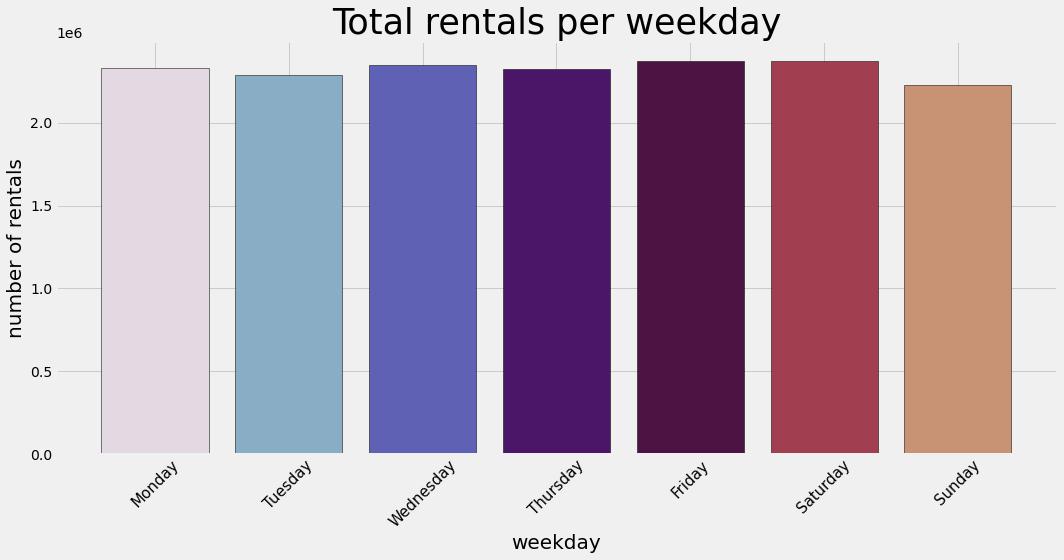

In [32]:
day_table = bicycle.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15,8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('Total rentals per weekday', fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for year, color in zip(years, colors):
    
    precipitation_prb = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()